# HEART DISEASE PREDICTION MODEL

In [30]:
# Importing necessary libraries
import lightgbm as lgb
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt
plt.style.use("ggplot")
import warnings
warnings.filterwarnings('ignore')


In [31]:
# Load dataset
df = pd.read_csv('Test Dataset.csv')
df.head()

,id,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
0,16501,70,1,0,163,495,0,2,170,1,2.0,1,0,1
1,10444,61,1,0,131,238,0,2,74,1,4.9,2,2,2
2,14288,53,1,0,95,558,1,1,73,1,0.7,1,1,0
3,10409,37,0,1,178,287,0,1,192,1,5.7,1,0,0
4,17330,35,0,3,104,281,0,0,122,0,1.3,1,4,3


In [32]:
# Converting the Train Dataset columns to Lower string
df.columns = df.columns.str.lower()
display(df)

,id,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
0,16501,70,1,0,163,495,0,2,170,1,2.0,1,0,1
1,10444,61,1,0,131,238,0,2,74,1,4.9,2,2,2
2,14288,53,1,0,95,558,1,1,73,1,0.7,1,1,0
3,10409,37,0,1,178,287,0,1,192,1,5.7,1,0,0
4,17330,35,0,3,104,281,0,0,122,0,1.3,1,4,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2692,14964,34,0,3,136,291,0,1,163,0,2.6,2,2,3
2693,16774,72,0,1,104,166,1,2,95,1,0.3,0,2,2
2694,18884,31,1,0,153,457,1,1,170,1,3.8,0,3,1
2695,10000,71,0,0,111,242,1,0,147,1,5.3,0,1,2


In [5]:
# Checking for the info 
display(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7303 entries, 0 to 7302
Data columns (total 15 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   id        7303 non-null   int64  
 1   age       7303 non-null   int64  
 2   sex       7303 non-null   int64  
 3   cp        7303 non-null   int64  
 4   trestbps  7303 non-null   int64  
 5   chol      7303 non-null   int64  
 6   fbs       7303 non-null   int64  
 7   restecg   7303 non-null   int64  
 8   thalach   7303 non-null   int64  
 9   exang     7303 non-null   int64  
 10  oldpeak   7303 non-null   float64
 11  slope     7303 non-null   int64  
 12  ca        7303 non-null   int64  
 13  thal      7303 non-null   int64  
 14  target    7303 non-null   int64  
dtypes: float64(1), int64(14)
memory usage: 855.9 KB


None

In [6]:
# Statistical summary of the Train Dataset
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
id,7303.0,15021.535396,2886.026080,10001.0,12521.5,15054.0,17513.5,19998.0
age,7303.0,53.172669,14.185970,29.0,41.0,53.0,65.0,77.0
sex,7303.0,0.499658,0.500034,0.0,0.0,0.0,1.0,1.0
cp,7303.0,1.502533,1.115594,0.0,1.0,1.0,3.0,3.0
trestbps,7303.0,147.447487,31.099538,94.0,120.0,148.0,174.0,200.0
chol,7303.0,342.805970,127.291998,126.0,231.0,341.0,450.0,564.0
fbs,7303.0,0.493085,0.499986,0.0,0.0,0.0,1.0,1.0
restecg,7303.0,1.013008,0.815806,0.0,0.0,1.0,2.0,2.0
thalach,7303.0,136.506093,38.141966,71.0,104.0,137.0,170.0,202.0
exang,7303.0,0.503218,0.500024,0.0,0.0,1.0,1.0,1.0


In [7]:
# Checking for duplicate and null values
display(df.isnull().sum())
print('=============================================')
display(df.duplicated().sum())

id          0
age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

0

#### **Creating a bar plot that shows the total counts per target value.**

<Axes: xlabel='target', ylabel='count'>

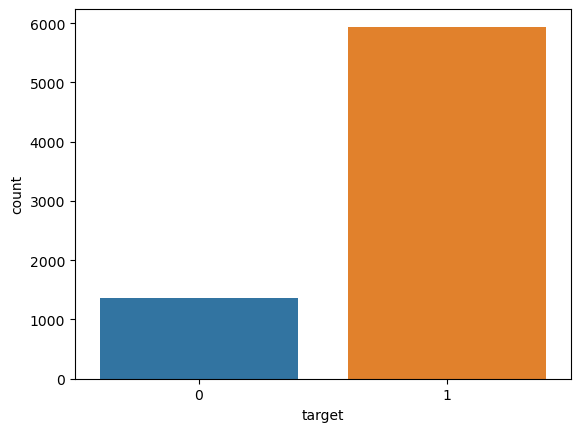

In [8]:
sns.countplot(x='target',data=df)

#### **Creating a pairplot that displays the relationships between the following columns:**

['age','trestbps', 'chol','thalach','target']

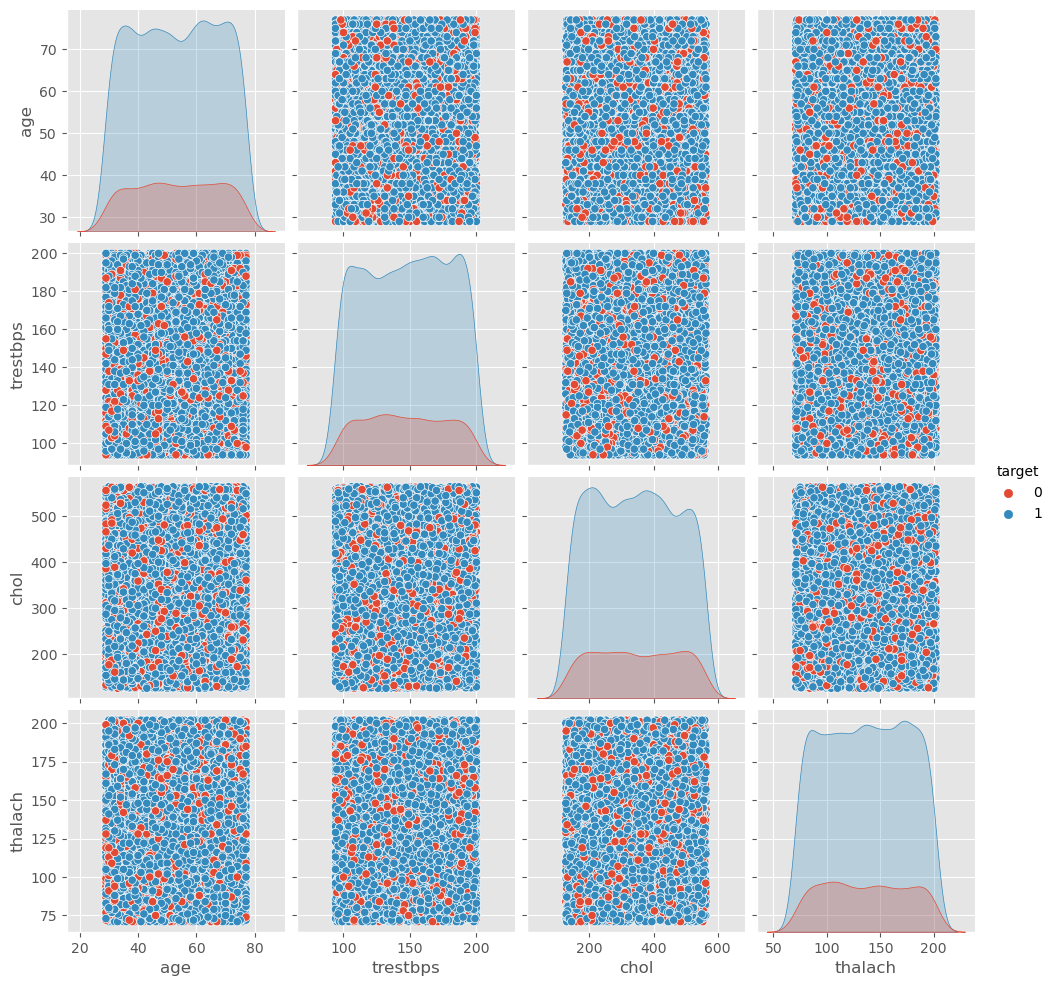

In [11]:
# Running pairplot on everything will take a very long time to render!
sns.pairplot(df[['age','trestbps', 'chol','thalach','target']],hue='target')

#### **Creating a heatmap that displays the correlation between all the columns.**

<Axes: >

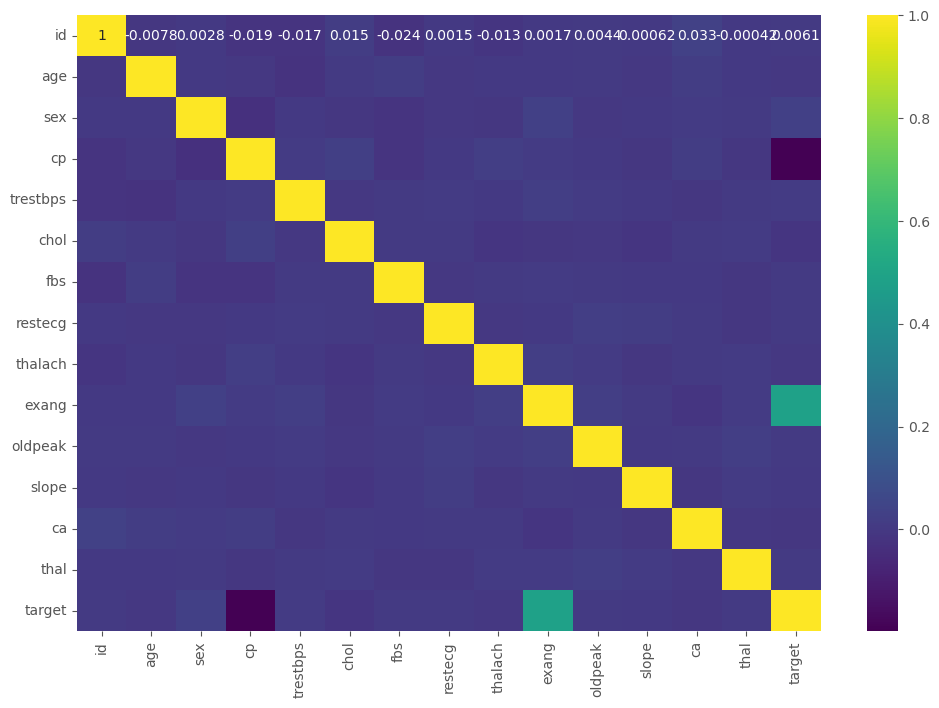

In [13]:
plt.figure(figsize=(12,8))
sns.heatmap(df.corr(),cmap='viridis',annot=True)

# Machine Learning

## Train | Test Split and Scaling

**Separate the features from the labels into 2 objects, x and y.**

In [17]:
# Split data into features (X) and target (y)
X = df.drop('target', axis=1)
y = df['target']


In [18]:
# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


# USING LIGHTGBM MODEL

In [19]:
# Create LightGBM dataset
train_data = lgb.Dataset(X_train, label=y_train)
test_data = lgb.Dataset(X_test, label=y_test)


In [20]:
# Define LightGBM parameters
params = {
    'objective': 'binary',
    'metric': 'auc',
    'boosting_type': 'gbdt',
    'num_leaves': 31,
    'learning_rate': 0.05,
    'feature_fraction': 0.9,
    'bagging_fraction': 0.8,
    'bagging_freq': 5,
    'verbose': 1
}

In [21]:
# Train LightGBM model
model_lg = lgb.train(params, train_data, num_boost_round=100)


[LightGBM] [Info] Number of positive: 4740, number of negative: 1102
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001276 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 879
[LightGBM] [Info] Number of data points in the train set: 5842, number of used features: 14
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.811366 -> initscore=1.458910
[LightGBM] [Info] Start training from score 1.458910


In [22]:
# Make predictions
y_pred_lg = model_lg.predict(X_test)
y_pred_class_lg = (y_pred_lg >= 0.5).astype(int)


In [23]:
# Evaluate model
accuracy = accuracy_score(y_test, y_pred_class_lg)
print(f"Accuracy: {accuracy:.3f}")
print(classification_report(y_test, y_pred_class_lg))
print(confusion_matrix(y_test, y_pred_class_lg))


Accuracy: 0.823
              precision    recall  f1-score   support

           0       0.50      0.52      0.51       260
           1       0.90      0.89      0.89      1201

    accuracy                           0.82      1461
   macro avg       0.70      0.71      0.70      1461
weighted avg       0.83      0.82      0.82      1461

[[ 136  124]
 [ 135 1066]]


# Testing on the Giving Test Dataset

In [34]:
df2 = pd.read_csv('Test Dataset.csv')


In [25]:
# Testing it with the test Dataset
patient = df2

In [26]:
new_pre = model_lg.predict(patient)
pred_class_lg = (new_pre >= 0.5).astype(int)

In [27]:
pred_df = pd.DataFrame({'id':patient['id'], 'Heart Disease':pred_class_lg})

In [29]:
pred_df.to_csv('Disease_Prediction1.csv', index=False)